In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [5]:
#NUMERICOS ENTEROS QUE ERAN INNECESARIAMENTE FLOAT
#------------------------------------------------#

#NUMERICOS QUE SOLO SON CERO O UNO
df['usosmultiples'] = df['usosmultiples'].astype(np.int8)
df['piscina'] = df['piscina'].astype(np.int8)
df['gimnasio'] = df['gimnasio'].astype(np.int8)
df['escuelascercanas'] = df['escuelascercanas'].astype(np.int8)
df['centroscomercialescercanos'] = df['centroscomercialescercanos'].astype(np.int8)


#FECHA DE PUBLICACION A DATETIME
df['fecha'] = pd.to_datetime(df['fecha'])


# A estos hay que limpiarles los inf y los NaN antes de convertir a int

#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [6]:
# A estos hay que limpiarles los inf y los NaN antes de convertir a int
#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

In [7]:
# Porcentaje de NaN's por columna, sabiendo que existen 240.000 filas
df.isnull().sum() / 240000 * 100

id                             0.000000
titulo                         2.244583
descripcion                    0.674583
tipodepropiedad                0.019167
direccion                     22.113333
ciudad                         0.155000
provincia                      0.064583
antiguedad                    18.147917
habitaciones                   9.362917
garages                       15.735417
banos                         10.925417
metroscubiertos                7.250000
metrostotales                 21.444583
idzona                        11.925417
lat                           51.453333
lng                           51.453333
fecha                          0.000000
gimnasio                       0.000000
usosmultiples                  0.000000
piscina                        0.000000
escuelascercanas               0.000000
centroscomercialescercanos     0.000000
precio                         0.000000
dtype: float64

In [8]:
dropdown_categories = df.loc[:,['provincia','ciudad','habitaciones','garages','tipo_de_propiedad']]
dropdown_categories.isnull().sum() / 240000 * 100

/home/lorenzo/.local/lib/python2.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


provincia              0.064583
ciudad                 0.155000
habitaciones           9.362917
garages               15.735417
tipo_de_propiedad    100.000000
dtype: float64

In [9]:
# Voy a estudiar el % de completitud de las categorias de interes año a año
df['fecha'] = pd.to_datetime(df['fecha'])

nulos_por_anio = df.drop(['descripcion','tipodepropiedad','ciudad','provincia','metroscubiertos'
                          ,'gimnasio','usosmultiples','piscina','escuelascercanas'
                          ,'centroscomercialescercanos','precio', 'idzona', 'id', 'fecha', 'lng'],1)

nulos_por_anio['anio'] = df['fecha'].dt.year
nulos_por_anio.head()

def contar_nulos(serie):
    
    serie = serie.apply(lambda x: 1 if pd.isnull(x) else 0)#.apply(hacer_dos)
    return np.sum(serie)
    
nulos_por_anio_cat = nulos_por_anio.groupby('anio').agg(contar_nulos).reset_index()
totales_por_anio = nulos_por_anio.groupby('anio')['lat'].agg(len).reset_index()
totales_por_anio = totales_por_anio.rename(columns={'lat' : 'totales'})

pct_nulos_por_anio_cat = pd.merge(nulos_por_anio_cat, totales_por_anio, on = 'anio', how = 'inner')

def sacar_porcentaje(serie):
    
    copia_anios = serie['anio']
    copia_totales = serie['totales']
    serie_porcentual = serie / copia_totales * 100
    
    serie_porcentual['anio'] = copia_anios
    serie_porcentual['totales'] = copia_totales
    
    return serie_porcentual

pct_nulos_por_anio_cat = pct_nulos_por_anio_cat.apply(sacar_porcentaje, axis = 1)
pct_nulos_por_anio_cat['anio'] = pct_nulos_por_anio_cat['anio'].astype(np.int32)
pct_nulos_por_anio_cat['totales'] = pct_nulos_por_anio_cat['totales'].astype(np.int32)


In [10]:
pct_nulos_por_anio_cat.head()

,anio,titulo,direccion,antiguedad,habitaciones,garages,banos,metrostotales,lat,totales
0,2012,11.332540,10.605932,0.254950,8.965752,8.778788,10.346732,29.072831,59.909068,23534
1,2013,1.951557,25.857303,1.471072,8.809978,8.118871,10.123083,25.742118,34.683736,30386
2,2014,2.627428,26.515824,23.925367,10.386473,13.159322,11.081534,21.909198,58.678399,40572
3,2015,1.225957,29.516223,28.305809,9.129590,15.181659,10.953954,19.265592,58.721585,51470
4,2016,0.457262,17.832153,19.962143,9.327081,21.352007,11.246517,19.139071,47.660520,94038


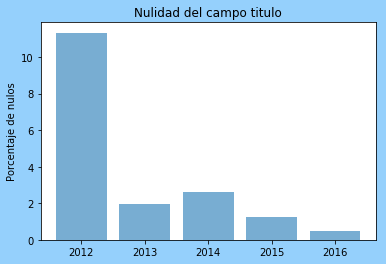

In [11]:
ds = pct_nulos_por_anio_cat

objects = ds['anio']
y_pos = np.arange(len(objects))
performance = ds['titulo']

fig = plt.figure()
fig.patch.set_facecolor('xkcd:light blue')

plt.bar(y_pos, performance, align='center', alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Porcentaje de nulos')
plt.title('Nulidad del campo titulo')
plt.show()



/home/lorenzo/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


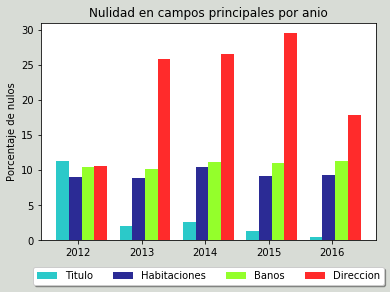

In [12]:
ds = pct_nulos_por_anio_cat

import numpy as np
import matplotlib.pyplot as plt

data = [ds['titulo'], ds['habitaciones'], ds['banos'], ds['direccion']]
objects = ds['anio']

fig = plt.figure()
fig.patch.set_facecolor('xkcd:light grey')

X = np.arange(5)

plt.ylabel('Porcentaje de nulos')
plt.title('Nulidad en campos principales por anio')

plt.bar(X + 0.00, data[0], color = 'c', alpha = 0.83 ,width = 0.20, label='Titulo')
plt.bar(X + 0.20, data[1], color = 'navy', alpha = 0.83 ,width = 0.20, label='Habitaciones')
plt.bar(X + 0.40, data[2], color = 'chartreuse', alpha = 0.83 , width = 0.20, label='Banos')
plt.bar(X + 0.60, data[3], color = 'r', alpha = 0.83 , width = 0.20, label='Direccion')
plt.xticks(X+0.25, objects)


ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.show()

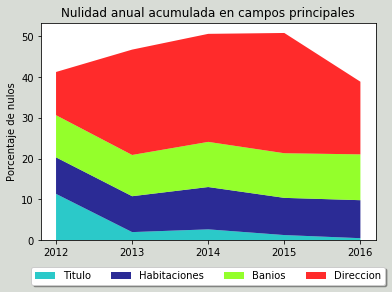

In [13]:
# --- FORMAT 1

ds = pct_nulos_por_anio_cat 
    
# Your x and y axis
data = [ds['titulo'], ds['habitaciones'], ds['banos'], ds['direccion']]# ds['metrostotales']]
years = ['2012','2013','2014','2015','2016']#ds['anio']

fondo = plt.figure()
fondo.patch.set_facecolor('xkcd:light grey')

pal = ['c', 'navy', 'chartreuse', 'r']

plt.stackplot(years, data, colors = pal, alpha = 0.83,
              labels=['Titulo','Habitaciones','Banios', 'Direccion', 'Metros Totales'])

plt.ylabel('Porcentaje de nulos')
plt.title('Nulidad anual acumulada en campos principales')


ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.show()

In [29]:
#Armo funcion para graficar en el plano

def graficar_plano(coordenadas, anio):

    fondo = plt.figure()
    fondo.patch.set_facecolor('xkcd:light grey')
    plt.title('Cobertura del sitio para el anio '+anio)

    #Asigno en ejes
    y = coordenadas['lat']
    x = coordenadas['lng']

    #Ploteo en rojo
    plt.scatter(x, y, color = "r", alpha = 0.30)


    #Importo coordenadas (algunas) de mexico
    mex = pd.read_csv("mapa/mexico.csv")

    #Asigno ejes
    y2 = mex['lat']
    x2 = mex['len']

    #Ploteo en azul
    plt.scatter(x2, y2, color = 'b', alpha = 0.70)

    plt.grid(color='black', linestyle='-', linewidth=1, alpha = 0.2)

    plt.show()

In [30]:
#Me quedo con las coordenadas
df['anio'] = pd.to_datetime(df['fecha']).dt.year

coordenadas = df.loc[:,["lat","lng","anio"]]

#Remuevo las nulas (son un monton)
coordenadas = coordenadas.dropna()

#Filtro solo coordenadas que pertenezcan al area de mexico
coordenadas_ok = coordenadas.loc[(coordenadas['lat'] < 50) & (coordenadas['lat'] > 13)
                                &(coordenadas['lng'] < -80) & (coordenadas['lng'] > -120)]

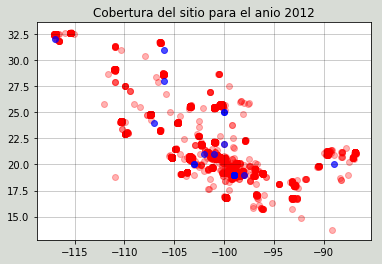

In [31]:
coordenadas_al_2012 = coordenadas_ok.loc[coordenadas_ok['anio'] == 2012]
graficar_plano(coordenadas_al_2012, '2012')

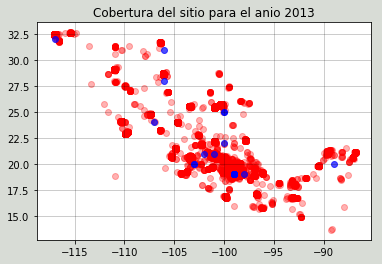

In [32]:
coordenadas_al_2013 = coordenadas_ok.loc[(coordenadas_ok['anio'] == 2013) | 
                                         (coordenadas_ok['anio'] == 2012)]
graficar_plano(coordenadas_al_2013, '2013')

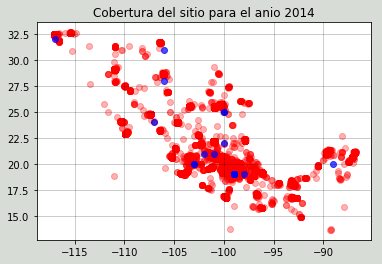

In [33]:
coordenadas_al_2014 = coordenadas_ok.loc[(coordenadas_ok['anio'] == 2014) | 
                                         (coordenadas_ok['anio'] == 2013) | 
                                         (coordenadas_ok['anio'] == 2012)]
graficar_plano(coordenadas_al_2014, '2014')

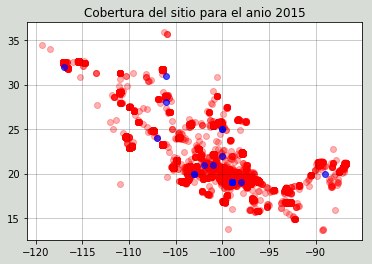

In [34]:
coordenadas_al_2015 = coordenadas_ok.loc[(coordenadas_ok['anio'] == 2015) |
                                         (coordenadas_ok['anio'] == 2014) | 
                                         (coordenadas_ok['anio'] == 2013) | 
                                         (coordenadas_ok['anio'] == 2012)]
graficar_plano(coordenadas_al_2015, '2015')

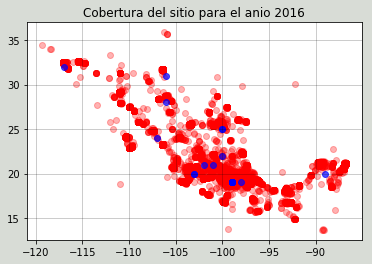

In [35]:
coordenadas_al_2016 = coordenadas_ok.loc[(coordenadas_ok['anio'] == 2016) |
                                         (coordenadas_ok['anio'] == 2015) |
                                         (coordenadas_ok['anio'] == 2014) | 
                                         (coordenadas_ok['anio'] == 2013) | 
                                         (coordenadas_ok['anio'] == 2012)]
graficar_plano(coordenadas_al_2016, '2016')